**19/03/20**

## Differential expression analysis between groups by BRCA1/2 status

Used DEseq2 to compare raw counts of BRCA1 expression between groups of samples with different BRCA1 mutation status.
* None and deletion 
* Somatic and none
* Germline and none

Also repeated for BRCA2 but combined SNVs together to bring sample sizes from 4-5 to 9.
* None and deletion
* SNV and none



In [3]:
#setwd("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/rnaseq/analysis/SHGSOC")
# wd  = /exports/igmm/datastore/HGS-OvarianCancerA-SGP-WGS/rnaseq/analysis/SHGSOC
require(tximport)
require(DESeq2)

Loading required package: tximport
Loading required package: DESeq2
Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which,

In [2]:
#Load all salmon quantification files for three cohorts
files_scot<-dir("../../alignments/SHGSOC/salmon",pattern="quant.sf",recursive = T,full.names = TRUE)
files_scot_additional<-dir("../../bcbio/SHGSOC/2019-2-26",pattern="quant.sf",recursive = T,full.names = TRUE)
files_aocs<-dir("../AOCS/salmon",pattern="quant.sf",recursive = T,full.names = TRUE)
files_tcga<-dir("../../bcbio/TCGA_US_OV/TCGAvirtualproj",pattern="quant.sf",recursive = T,full.names = TRUE)
files<-c(files_scot,files_scot_additional,files_aocs,files_tcga)

rna_reps_to_exclude<-read.table("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Analysis/RNAseq/RNAseq_replicates_forexclusion.txt",sep="\t")
rna_reps_to_exclude<-as.character(rna_reps_to_exclude[,1])

new_files_orig<-setdiff(files,rna_reps_to_exclude)
tx2knownGene <- read.csv("tx2gene.csv",header = F)

names(new_files_orig)[1:37]<-do.call("cbind",strsplit(new_files_orig[1:37],split = "[/.]"))[10,]
names(new_files_orig)[38:42]<-do.call("cbind",strsplit(new_files_orig[38:42],split = "[/.]"))[10,]
names(new_files_orig)[43:122]<-do.call("cbind",strsplit(new_files_orig[43:122],split = "[/.]"))[6,]
names(new_files_orig)[123:152]<-do.call("cbind",strsplit(new_files_orig[123:152],split = "[/.]"))[10,]

txi.salmon <- tximport(new_files_orig, type = "salmon", tx2gene = tx2knownGene)

reading in files with read_tsv
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 
summarizing abundance
summarizing counts
summarizing length


In [3]:
sample<-read.table("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/SampleInformation.txt",sep="\t",header=T,stringsAsFactors=F)
sample_expr<-sample[,c("Sample","BRCA1status_SV","BRCA2status_SV","BRCA1_pro_meth")]

rna_sampleids<-colnames(head(txi.salmon$counts))
rna_short_sampleids<-rep(NA,length(rna_sampleids))
rna_short_sampleids[1:42]<-substr(rna_sampleids[1:42],1,9)
rna_short_sampleids[43:122]<-substr(rna_sampleids[43:122],1,8)
rna_short_sampleids[123:152]<-substr(rna_sampleids[123:152],1,7)
rna<-data.frame(RNA_sample=rna_sampleids,Sample=rna_short_sampleids)
rna<-rna[as.character(rna$Sample) %in% as.character(sample_expr$Sample),]

new_files<-new_files_orig[as.character(rna$RNA_sample)]

txi.salmon2 <- tximport(new_files, type = "salmon", tx2gene = tx2knownGene)

reading in files with read_tsv
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 
summarizing abundance
summarizing counts
summarizing length


In [4]:
#save(txi.salmon2,file="~/Desktop/txi.salmon2.RData")
load("~/Desktop/txi.salmon2.130220.RData")

In [5]:

sample<-read.table("~/Desktop/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/SampleInformation.txt",sep="\t",header=T,stringsAsFactors=F)
sample_expr<-sample[,c("Sample","BRCA1status_SV","BRCA2status_SV","BRCA1_pro_meth")]

rna_sampleids<-colnames(head(txi.salmon2$counts))
rna_short_sampleids<-rep(NA,length(rna_sampleids))
rna_short_sampleids[1:40]<-substr(rna_sampleids[1:40],1,9)
rna_short_sampleids[41:120]<-substr(rna_sampleids[41:120],1,8)
rna_short_sampleids[121:150]<-substr(rna_sampleids[121:150],1,7)
rna<-data.frame(RNA_sample=rna_sampleids,Sample=rna_short_sampleids)
rna<-rna[as.character(rna$Sample) %in% as.character(sample_expr$Sample),]




                    Excluded                         None 
                          64                          131 
 SNV + deletion (other gene)   SNV + deletion (same gene) 
                           3                            6 
SNV + deletions (both genes) 
                           1 


Complex combination of SV intervals including 1+ LOF (CPX: LOF) 
                                                              2 
                         Complex combination of SVs without LOF 
                                                              3 
                                Deletion overlapping exon (LOF) 
                                                             26 
                                                   Germline SNV 
                                                             22 
                             Inversion spanning gene (INV_SPAN) 
                                                             11 
                                                           None 
                                                            131 
                                                    Somatic SNV 
                                                             10 

Warning message:
“Removed 8 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 8 rows containing missing values (geom_point).”


	Wilcoxon rank sum test

data:  BRCA1_VST by Cat
W = 73, p-value = 0.2241
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  BRCA1_VST by Cat
t = 1.3665, df = 7.3021, p-value = 0.2124
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4338221  1.6455772
sample estimates:
 mean in group Just deletion mean in group SNV + deletion 
                    9.437382                     8.831505 


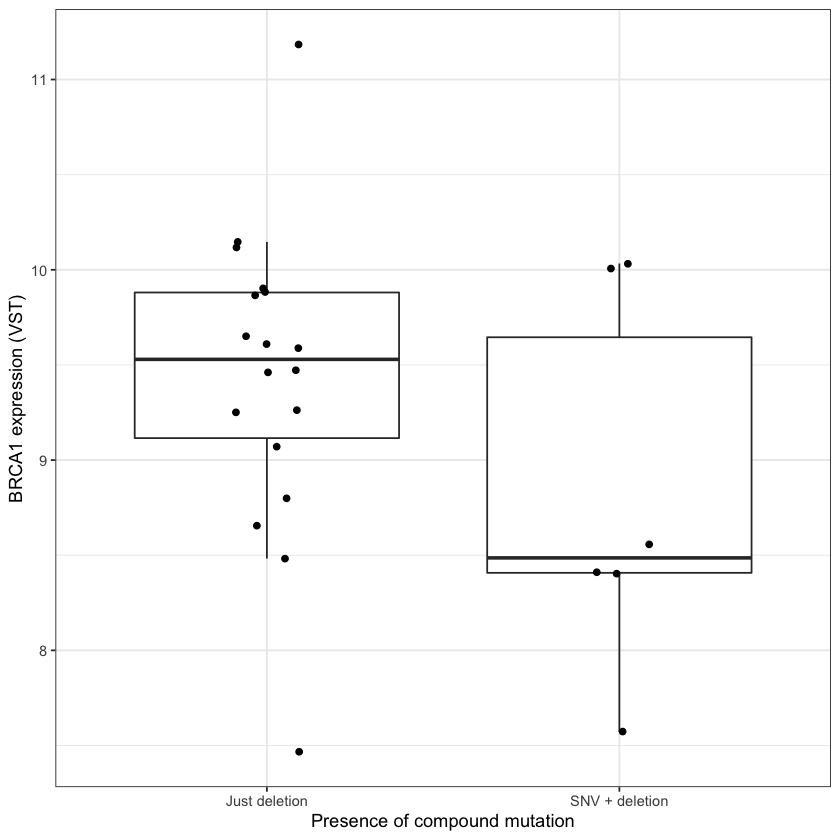

In [6]:
library(ggplot2)
sample<-read.table("~/Desktop/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/SampleInformation.txt",sep="\t",header=T,stringsAsFactors=F)

#sample<-read.table("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/SampleInformation.txt",sep="\t",header=T,stringsAsFactors=F)

table(sample$BRCA1status_compound)
table(sample$BRCA1status)

subsample<-sample[sample$BRCA1status=="Deletion overlapping exon (LOF)" | sample$BRCA1status_compound == "SNV + deletion (same gene)",]
subsample[subsample$BRCA1status=="Deletion overlapping exon (LOF)","Cat"]<-"Just deletion"
subsample[subsample$BRCA1status_compound=="SNV + deletion (same gene)","Cat"]<-"SNV + deletion"

subsample2<-sample[sample$BRCA1status=="Deletion overlapping exon (LOF)",]
subsample2[subsample2$BRCA1status=="Deletion overlapping exon (LOF)" & subsample2$BRCA1_pro_meth==0,"Cat2"]<-"Just deletion"
subsample2[subsample2$BRCA1status=="Deletion overlapping exon (LOF)" & subsample2$BRCA1_pro_meth==1,"Cat2"]<-"Meth + deletion"

subsample<-subsample[,c("BRCA1_VST","Cat")]
#png("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Figures/Intermediate_figure_making_files/Supp_figs/BRCA1_expr_dels_snvdels.png",width=6,height=4,res=300,unit="in")
ggplot(subsample,aes(x=Cat, y=BRCA1_VST))+geom_boxplot(outlier.shape=NA)+geom_jitter(width=0.1)+theme_bw()+
ylab("BRCA1 expression (VST)")+xlab("Presence of compound mutation")
#dev.off()

wilcox.test(BRCA1_VST~Cat,data=subsample)
t.test(BRCA1_VST~Cat,data=subsample)

sample$split_dels<-"Excluded"
sample[sample$BRCA1status=="Deletion overlapping exon (LOF)","split_dels"]<-"Just deletion"
sample[sample$BRCA1status_compound=="SNV + deletion (same gene)","split_dels"]<-"SNV + deletion"
sample_expr<-sample[,c("Sample","split_dels","Purity")]



#However categories are significantly different when tested with DESeq2

In [7]:
#BRCA1
#set up condition
coldata<-merge(rna,sample_expr,by="Sample",all.x=T)
rownames(coldata)<-as.character(coldata$RNA_sample)
coldata$Cohort<-substr(as.character(coldata$Sample),1,2)

coldata<-coldata[as.character(rna$RNA_sample),]

coldata$condition<-factor(coldata$split_dels)
table(coldata$split_dels)
dim(coldata)
rownames(coldata)<-c(1:150)

dds <- DESeqDataSetFromTximport(txi.salmon2, 
                               colData = coldata,
                                design=~Cohort+Purity+condition)



      Excluded  Just deletion SNV + deletion 
           126             18              6 

[1] 150   6

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
using counts and average transcript lengths from tximport


In [8]:
#Deletions vs deletions+snvs
justdels_delssnvs<-c(which(coldata$condition=="Just deletion"),which(coldata$condition=="SNV + deletion"))
ddsjustdels_delssnvs<-dds[,justdels_delssnvs]
colData(ddsjustdels_delssnvs)$condition<-droplevels(colData(ddsjustdels_delssnvs)$condition)
table(colData(ddsjustdels_delssnvs)$condition,colData(ddsjustdels_delssnvs)$Cohort)

ddsjustdels_delssnvs <- DESeq(ddsjustdels_delssnvs)
res<-results(ddsjustdels_delssnvs)
res["ENSG00000012048",]
res["ENSG00000012048","pvalue"]

                
                 AO DO SH
  Just deletion  12  3  3
  SNV + deletion  2  2  2

estimating size factors
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
final dispersion estimates
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as th

log2 fold change (MLE): condition SNV...deletion vs Just.deletion 
Wald test p-value: condition SNV...deletion vs Just.deletion 
DataFrame with 1 row and 6 columns
                        baseMean     log2FoldChange             lfcSE
                       <numeric>          <numeric>         <numeric>
ENSG00000012048 673.944518819562 -0.886095747130965 0.365571549807866
                             stat            pvalue              padj
                        <numeric>         <numeric>         <numeric>
ENSG00000012048 -2.42386407694109 0.015356351891155 0.294328737216066

[1] 0.01535635

In [60]:
#BRCA1
#set up condition
sample<-read.table("~/Desktop/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/SampleInformation.txt",sep="\t",header=T,stringsAsFactors=F)

#sample<-read.table("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/SampleInformation.txt",sep="\t",header=T,stringsAsFactors=F)


sample_expr<-sample[,c("Sample","BRCA1status_SV","BRCA2status_SV","BRCA1_pro_meth","BRCA1status","BRCA1_VST","Purity")]

coldata<-merge(rna,sample_expr,by="Sample",all.x=T)
rownames(coldata)<-as.character(coldata$RNA_sample)
coldata$Cohort<-substr(as.character(coldata$Sample),1,2)

#Exclude missing
coldata[is.na(coldata$BRCA1status_SV),"BRCA1status_SV"]<-"Excluded"
coldata[is.na(coldata$BRCA2status_SV),"BRCA2status_SV"]<-"Excluded"


#Exclude SNVs from all categories
coldata[coldata$BRCA1status=="Germline SNV" & coldata$BRCA1status_SV=="Deletion overlapping exon (LOF)",
        "BRCA1status_SV"]<-"SNV + deletion"
coldata[coldata$BRCA1status=="Somatic SNV" & coldata$BRCA1status_SV=="Deletion overlapping exon (LOF)",
        "BRCA1status_SV"]<-"SNV + deletion"

#Exclude SNVs from all categories
coldata[coldata$BRCA1status=="Germline SNV" & coldata$BRCA1status_SV!="SNV + deletion","BRCA1status_SV"]<-"Excluded"
coldata[coldata$BRCA1status=="Somatic SNV" & coldata$BRCA1status_SV!="SNV + deletion","BRCA1status_SV"]<-"Excluded"

#Exclude methyl from SV absent
coldata[coldata$BRCA1_pro_meth==1,"BRCA1status_SV"]<-"Excluded"
coldata[coldata$BRCA1_pro_meth==1,"BRCA2status_SV"]<-"Excluded"
coldata<-coldata[as.character(rna$RNA_sample),]

coldata$condition<-factor(coldata$BRCA1status_SV)
table(coldata$BRCA1status_SV)
dim(coldata)
rownames(coldata)<-c(1:150)

dds <- DESeqDataSetFromTximport(txi.salmon2, 
                               colData = coldata,
                                design=~Cohort+Purity+condition)



Complex combination of SV intervals including 1+ LOF (CPX: LOF) 
                                                              2 
                         Complex combination of SVs without LOF 
                                                              2 
                                Deletion overlapping exon (LOF) 
                                                             17 
                                                       Excluded 
                                                             35 
                             Inversion spanning gene (INV_SPAN) 
                                                              4 
                                                 SNV + deletion 
                                                              7 
                                                      SV absent 
                                                             83 

[1] 150  10

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
using counts and average transcript lengths from tximport


In [10]:
#a<-as.character(coldata$Sample)
#save(a,file="~/Desktop/samples_in_BRCA1deseq2.RData")

In [61]:
#Deletions
brca1dels_none<-c(which(coldata$condition=="SV absent"),
                            which(coldata$condition=="Deletion overlapping exon (LOF)"))
                      


ddsbrca1del<-dds[,brca1dels_none]
colData(ddsbrca1del)$condition<-droplevels(colData(ddsbrca1del)$condition)
table(colData(ddsbrca1del)$condition,colData(ddsbrca1del)$Cohort)

ddsbrca1del <- DESeq(ddsbrca1del)
res<-results(ddsbrca1del)
res["ENSG00000012048",]
res["ENSG00000012048","pvalue"]


                                 
                                  AO DO SH
  Deletion overlapping exon (LOF) 11  3  3
  SV absent                       37 17 29

estimating size factors
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
final dispersion estimates
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as th

log2 fold change (MLE): condition SV.absent vs Deletion.overlapping.exon..LOF. 
Wald test p-value: condition SV.absent vs Deletion.overlapping.exon..LOF. 
DataFrame with 1 row and 6 columns
                        baseMean    log2FoldChange             lfcSE
                       <numeric>         <numeric>         <numeric>
ENSG00000012048 1165.13971953328 0.445738159038984 0.171352803289905
                            stat              pvalue               padj
                       <numeric>           <numeric>          <numeric>
ENSG00000012048 2.60128898086865 0.00928741829272165 0.0891489196563642

[1] 0.009287418

In [12]:
#Deletions + SNV
brca1delssnv_none<-c(which(coldata$condition=="SV absent"),which(coldata$condition=="SNV + deletion"))
ddsbrca1delsnv<-dds[,brca1delssnv_none]
colData(ddsbrca1delsnv)$condition<-droplevels(colData(ddsbrca1delsnv)$condition)
table(colData(ddsbrca1delsnv)$condition,colData(ddsbrca1delsnv)$Cohort)

ddsbrca1delsnv <- DESeq(ddsbrca1delsnv)
res<-results(ddsbrca1delsnv)
res["ENSG00000012048",]
res["ENSG00000012048","pvalue"]


                
                 AO DO SH
  SNV + deletion  3  2  2
  SV absent      37 17 29

estimating size factors
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
final dispersion estimates
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as th

log2 fold change (MLE): condition SV.absent vs SNV...deletion 
Wald test p-value: condition SV.absent vs SNV...deletion 
DataFrame with 1 row and 6 columns
                        baseMean   log2FoldChange             lfcSE
                       <numeric>        <numeric>         <numeric>
ENSG00000012048 1086.39623243134 1.27762442090375 0.265614811125839
                           stat              pvalue                 padj
                      <numeric>           <numeric>            <numeric>
ENSG00000012048 4.8100646778257 1.5088146572647e-06 0.000268882434260084

[1] 1.508815e-06

In [63]:
#Remove cohort effect
sample<-read.table("~/Desktop/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/SampleInformation.txt",sep="\t",header=T,stringsAsFactors=F)

#sample<-read.table("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/SampleInformation.txt",sep="\t",header=T,stringsAsFactors=F)


sample_expr<-sample[,c("Sample","BRCA1status_SV","BRCA2status_SV","BRCA1_pro_meth","BRCA1status","BRCA1_VST","Purity")]

coldata<-merge(rna,sample_expr,by="Sample",all.x=T)
rownames(coldata)<-as.character(coldata$RNA_sample)
coldata$Cohort<-substr(as.character(coldata$Sample),1,2)

#Exclude missing
coldata[is.na(coldata$BRCA1status_SV),"BRCA1status_SV"]<-"Excluded"
coldata[is.na(coldata$BRCA2status_SV),"BRCA2status_SV"]<-"Excluded"


#Exclude SNVs from all categories
coldata[coldata$BRCA1status=="Germline SNV" & coldata$BRCA1status_SV=="Deletion overlapping exon (LOF)",
        "BRCA1status_SV"]<-"SNV + deletion"
coldata[coldata$BRCA1status=="Somatic SNV" & coldata$BRCA1status_SV=="Deletion overlapping exon (LOF)",
        "BRCA1status_SV"]<-"SNV + deletion"

#Exclude SNVs from all categories
coldata[coldata$BRCA1status=="Germline SNV" & coldata$BRCA1status_SV!="SNV + deletion","BRCA1status_SV"]<-"Excluded"
coldata[coldata$BRCA1status=="Somatic SNV" & coldata$BRCA1status_SV!="SNV + deletion","BRCA1status_SV"]<-"Excluded"

#Exclude methyl from SV absent
coldata[coldata$BRCA1_pro_meth==1,"BRCA1status_SV"]<-"Excluded"
coldata[coldata$BRCA1_pro_meth==1,"BRCA2status_SV"]<-"Excluded"
coldata<-coldata[as.character(rna$RNA_sample),]

coldata$condition<-factor(coldata$BRCA1status_SV)
table(coldata$BRCA1status_SV)
dim(coldata)
rownames(coldata)<-c(1:150)


dds <- DESeqDataSetFromTximport(txi.salmon2, 
                               colData = coldata,
                                design=~Purity+condition)


#Inversions
table(coldata$condition,coldata$Cohort)

brca1invs_none<-c(which(coldata$condition=="SV absent"),
                            which(coldata$condition=="Inversion spanning gene (INV_SPAN)"))

ddsbrca1inv<-dds[,brca1invs_none]
colData(ddsbrca1inv)$condition<-droplevels(colData(ddsbrca1inv)$condition)


ddsbrca1inv <- DESeq(ddsbrca1inv)
res<-results(ddsbrca1inv)
res["ENSG00000012048",]
res["ENSG00000012048","pvalue"]



Complex combination of SV intervals including 1+ LOF (CPX: LOF) 
                                                              2 
                         Complex combination of SVs without LOF 
                                                              2 
                                Deletion overlapping exon (LOF) 
                                                             17 
                                                       Excluded 
                                                             35 
                             Inversion spanning gene (INV_SPAN) 
                                                              4 
                                                 SNV + deletion 
                                                              7 
                                                      SV absent 
                                                             83 

[1] 150  10

  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
using counts and average transcript lengths from tximport


                                                                 
                                                                  AO DO SH
  Complex combination of SV intervals including 1+ LOF (CPX: LOF)  1  1  0
  Complex combination of SVs without LOF                           1  1  0
  Deletion overlapping exon (LOF)                                 11  3  3
  Excluded                                                        26  6  3
  Inversion spanning gene (INV_SPAN)                               1  0  3
  SNV + deletion                                                   3  2  2
  SV absent                                                       37 17 29

estimating size factors
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
final dispersion estimates
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as th

log2 fold change (MLE): condition SV.absent vs Inversion.spanning.gene..INV SPAN. 
Wald test p-value: condition SV.absent vs Inversion.spanning.gene..INV SPAN. 
DataFrame with 1 row and 6 columns
                        baseMean     log2FoldChange             lfcSE
                       <numeric>          <numeric>         <numeric>
ENSG00000012048 1139.08996852677 0.0916873173154079 0.417317221197929
                             stat            pvalue              padj
                        <numeric>         <numeric>         <numeric>
ENSG00000012048 0.219706526972971 0.826099721078481 0.956920249162833

[1] 0.8260997

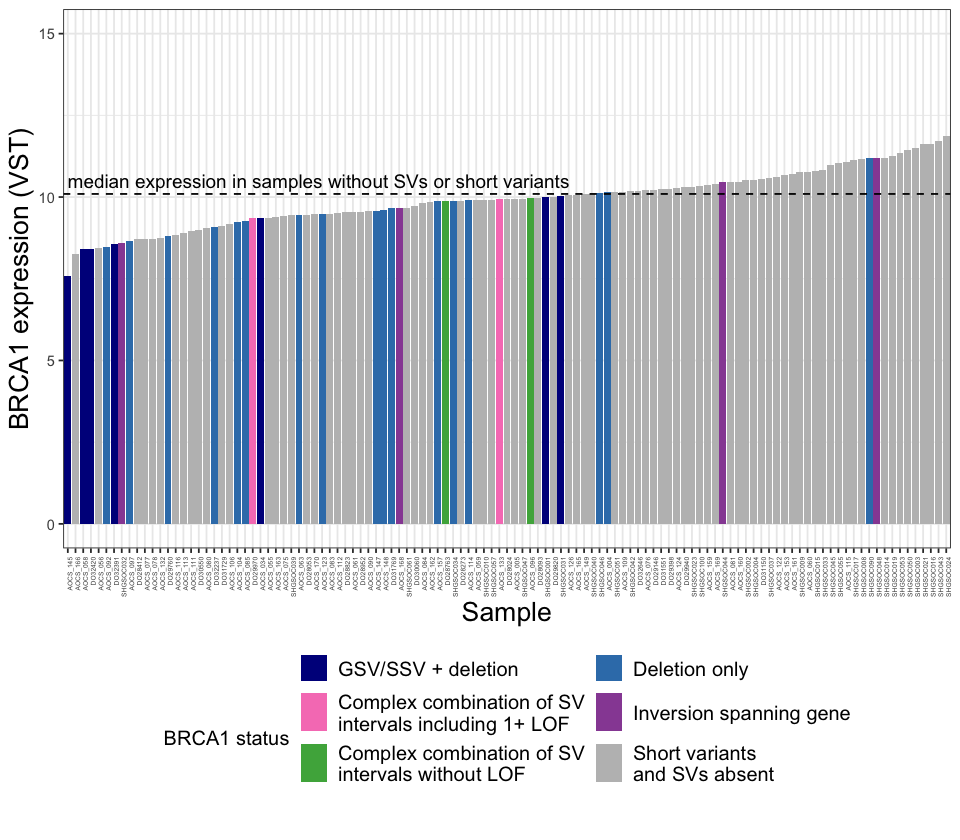

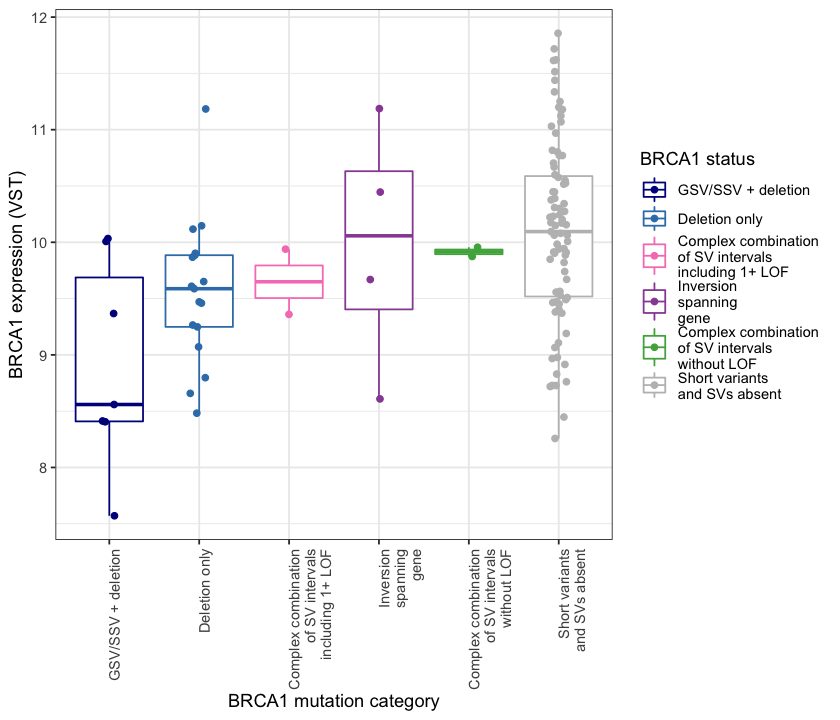

In [56]:
#BRCA1 plots
library(RColorBrewer)

#sample<-read.table("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/SampleInformation.txt",sep="\t",header=T,stringsAsFactors=F)

sample<-read.table("~/Desktop/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_data/SampleInformation.txt",sep="\t",header=T,stringsAsFactors=F)


sample_expr<-sample[,c("Sample","BRCA1status_SV","BRCA2status_SV","BRCA1_pro_meth","BRCA1status","BRCA1_VST")]

coldata<-merge(rna,sample_expr,by="Sample",all.x=T)
rownames(coldata)<-as.character(coldata$RNA_sample)
coldata$Cohort<-substr(as.character(coldata$Sample),1,2)

#Exclude missing
coldata[is.na(coldata$BRCA1status_SV),"BRCA1status_SV"]<-"Excluded"
coldata[is.na(coldata$BRCA2status_SV),"BRCA2status_SV"]<-"Excluded"


#Exclude SNVs from all categories
coldata[coldata$BRCA1status=="Germline SNV" & coldata$BRCA1status_SV=="Deletion overlapping exon (LOF)",
        "BRCA1status_SV"]<-"SNV + deletion"
coldata[coldata$BRCA1status=="Somatic SNV" & coldata$BRCA1status_SV=="Deletion overlapping exon (LOF)",
        "BRCA1status_SV"]<-"SNV + deletion"

#Exclude SNVs from all categories
coldata[coldata$BRCA1status=="Germline SNV" & coldata$BRCA1status_SV!="SNV + deletion","BRCA1status_SV"]<-"Excluded"
coldata[coldata$BRCA1status=="Somatic SNV" & coldata$BRCA1status_SV!="SNV + deletion","BRCA1status_SV"]<-"Excluded"

#Exclude methyl from SV absent
coldata[coldata$BRCA1_pro_meth==1,"BRCA1status_SV"]<-"Excluded"
coldata[coldata$BRCA1_pro_meth==1,"BRCA2status_SV"]<-"Excluded"
coldata<-coldata[as.character(rna$RNA_sample),]

coldata$condition<-factor(coldata$BRCA1status_SV)

rownames(coldata)<-c(1:150)

coldata<-coldata[coldata$BRCA1status_SV != "Excluded" & coldata$BRCA1status_SV != "Only methyl",]

coldata$BRCA1status_SV<-factor(coldata$BRCA1status_SV,levels=levels(factor(coldata$BRCA1status_SV))[c(5,3,1,4,2,6)])
coldata<-coldata[order(coldata$BRCA1_VST),]
coldata<-coldata[is.na(coldata$BRCA1_VST)==FALSE,]
coldata$Sample<-factor(coldata$Sample,levels=as.character(coldata$Sample))


cats<-c("GSV/SSV + deletion","Deletion only","Complex combination of SV\nintervals including 1+ LOF",
                          "Inversion spanning gene","Complex combination of SV\nintervals without LOF",
        "Short variants\nand SVs absent")

myColors <- c("darkblue",brewer.pal(9,"Set1")[c(2,8,4,3)],"grey")
names(myColors) <- levels(coldata$BRCA1status_SV)

fillScale <- scale_fill_manual(name = "BRCA1 status",values = myColors,labels=cats)


#png("~/Desktop/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_figures/Figure4_Expression_barplot_brca1.png",width=8,height=7,res=300,unit="in")
options(repr.plot.width=8,repr.plot.height=7)
ggplot(coldata,aes(x=Sample,y=BRCA1_VST,fill=as.factor(BRCA1status_SV)))+geom_bar(stat="identity")+theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1,size=4),axis.title=element_text(size=16),
      legend.position="bottom",legend.text = element_text(size=12),legend.title = element_text(size=12))+
guides(fill=guide_legend(nrow=4,byrow=TRUE))+

ylab("BRCA1 expression (VST)")+xlab("Sample")+fillScale+
geom_hline(yintercept=median(coldata[coldata$BRCA1status_SV=="SV absent","BRCA1_VST"]),linetype="dashed")+
annotate("text", x=1, y=10.5, adj=0,label= "median expression in samples without SVs or short variants",size=4)+ylim(c(0,15))
#dev.off()

cats_short<-c("GSV/SSV + deletion","Deletion only","Complex combination\nof SV intervals\nincluding 1+ LOF",
                          "Inversion\nspanning\ngene","Complex combination\nof SV intervals\nwithout LOF",
              "Short variants\nand SVs absent")

colScale <- scale_colour_manual(name = "BRCA1 status",values = myColors,labels=cats_short)
options(repr.plot.width=7,repr.plot.height=6)

#png("~/Desktop/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_figures/Figure4_Expression_boxplot_brca1.png",width=6,height=5,res=300,unit="in")
ggplot(coldata,aes(x=as.factor(BRCA1status_SV),y=BRCA1_VST,colour=as.factor(BRCA1status_SV)))+
geom_boxplot(outlier.shape=NA)+
geom_jitter(width=0.1)+theme_bw()+theme(axis.text.x = element_text(angle = 90, hjust = 1))+
ylab("BRCA1 expression (VST)")+xlab("BRCA1 mutation category")+colScale+scale_x_discrete(labels=cats_short)
#dev.off()

## BRCA2


                    Excluded                         None 
                          51                          145 
 SNV + deletion (other gene)   SNV + deletion (same gene) 
                           1                            3 
SNV + deletions (both genes) 
                           5 


Complex combination of SV intervals including 1+ LOF (CPX: LOF) 
                                                              1 
                         Complex combination of SVs without LOF 
                                                              5 
                                Deletion overlapping exon (LOF) 
                                                             21 
                          Duplication spanning gene (COPY_GAIN) 
                                                             11 
                                                   Germline SNV 
                                                             10 
                                  Intragenic exonic duplication 
                                                              1 
                             Inversion spanning gene (INV_SPAN) 
                                                              2 
                                                           None 
                        

Warning message:
“Removed 6 rows containing non-finite values (stat_boxplot).”Warning message:
“Removed 6 rows containing missing values (geom_point).”


	Wilcoxon rank sum test

data:  BRCA2_VST by Cat
W = 22, p-value = 1
alternative hypothesis: true location shift is not equal to 0



	Welch Two Sample t-test

data:  BRCA2_VST by Cat
t = -0.18901, df = 2.0826, p-value = 0.8669
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -6.483520  5.917763
sample estimates:
 mean in group Just deletion mean in group SNV + deletion 
                    8.925337                     9.208215 


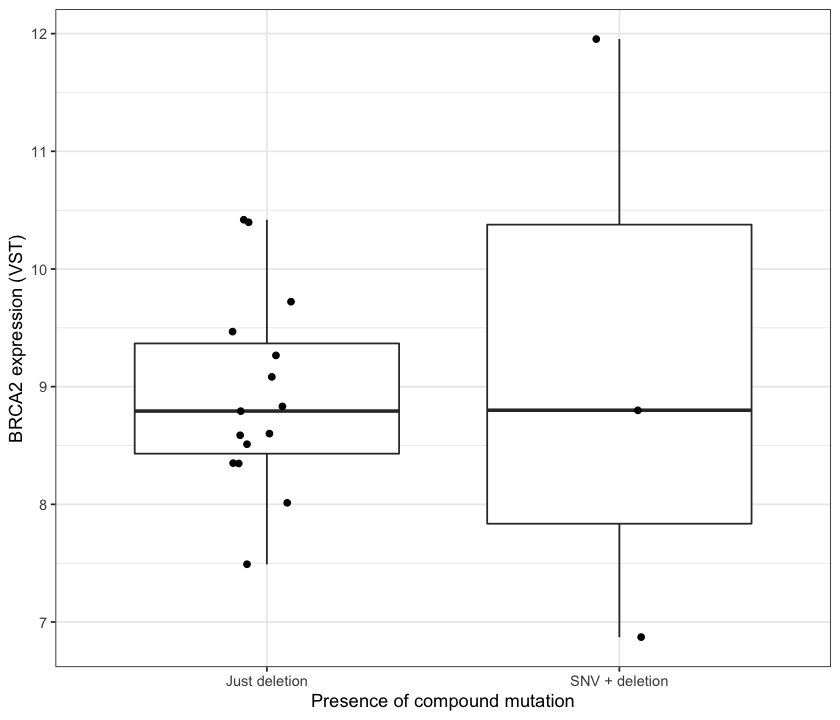

In [31]:
table(sample$BRCA2status_compound)
table(sample$BRCA2status)

subsample<-sample[sample$BRCA2status=="Deletion overlapping exon (LOF)" | sample$BRCA2status_compound == "SNV + deletion (same gene)",]
subsample[subsample$BRCA2status=="Deletion overlapping exon (LOF)","Cat"]<-"Just deletion"
subsample[subsample$BRCA2status_compound=="SNV + deletion (same gene)","Cat"]<-"SNV + deletion"

subsample<-subsample[,c("BRCA2_VST","Cat")]

#png("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Figures/Intermediate_figure_making_files/Supp_figs/BRCA2_expr_dels_snvdels.png",width=6,height=4,res=300,unit="in")
ggplot(subsample,aes(x=Cat, y=BRCA2_VST))+geom_boxplot(outlier.shape=NA)+geom_jitter(width=0.1)+theme_bw()+
ylab("BRCA2 expression (VST)")+xlab("Presence of compound mutation")

wilcox.test(BRCA2_VST~Cat,data=subsample)
t.test(BRCA2_VST~Cat,data=subsample)
#dev.off()

sample$split_dels<-"Excluded"
sample[sample$BRCA2status=="Deletion overlapping exon (LOF)","split_dels"]<-"Just deletion"
sample[sample$BRCA2status_compound=="SNV + deletion (same gene)","split_dels"]<-"SNV + deletion"
sample_expr<-sample[,c("Sample","split_dels","Purity")]

In [16]:
#BRCA2
#set up condition
coldata<-merge(rna,sample_expr,by="Sample",all.x=T)
rownames(coldata)<-as.character(coldata$RNA_sample)
coldata$Cohort<-substr(as.character(coldata$Sample),1,2)

coldata<-coldata[as.character(rna$RNA_sample),]

coldata$condition<-factor(coldata$split_dels)
table(coldata$split_dels)
dim(coldata)
rownames(coldata)<-c(1:150)

dds <- DESeqDataSetFromTximport(txi.salmon2, 
                               colData = coldata,
                                design=~Cohort+Purity+condition)



      Excluded  Just deletion SNV + deletion 
           132             15              3 

[1] 150   6

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
using counts and average transcript lengths from tximport


In [17]:
#Deletions vs deletions+snvs
justdels_delssnvs<-c(which(coldata$condition=="Just deletion"),which(coldata$condition=="SNV + deletion"))
ddsjustdels_delssnvs<-dds[,justdels_delssnvs]
colData(ddsjustdels_delssnvs)$condition<-droplevels(colData(ddsjustdels_delssnvs)$condition)
table(colData(ddsjustdels_delssnvs)$condition,colData(ddsjustdels_delssnvs)$Cohort)

ddsjustdels_delssnvs <- DESeq(ddsjustdels_delssnvs)
res<-results(ddsjustdels_delssnvs)
res["ENSG00000139618",]
res["ENSG00000139618","pvalue"]

                
                 AO DO SH
  Just deletion   8  4  3
  SNV + deletion  1  1  1

estimating size factors
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
final dispersion estimates
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as th

log2 fold change (MLE): condition SNV...deletion vs Just.deletion 
Wald test p-value: condition SNV...deletion vs Just.deletion 
DataFrame with 1 row and 6 columns
                        baseMean    log2FoldChange             lfcSE
                       <numeric>         <numeric>         <numeric>
ENSG00000139618 827.919791197842 0.484474369169466 0.647322984093483
                             stat            pvalue              padj
                        <numeric>         <numeric>         <numeric>
ENSG00000139618 0.748427571821705 0.454202296979022 0.999936254918491

[1] 0.4542023

In [57]:
#set up condition

#sample<-read.table("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Tables/SampleInformation.txt",sep="\t",header=T,stringsAsFactors=F)
sample<-read.table("~/Desktop/BRCA1_BRCA2_SVs_paper/Tables/SampleInformation.txt",sep="\t",header=T,stringsAsFactors=F)


sample_expr<-sample[,c("Sample","BRCA1status_SV","BRCA2status_SV","BRCA1_pro_meth","BRCA2status","Purity")]

coldata<-merge(rna,sample_expr,by="Sample",all.x=T)
rownames(coldata)<-as.character(coldata$RNA_sample)
coldata$Cohort<-substr(as.character(coldata$Sample),1,2)

#Exclude missing
coldata[is.na(coldata$BRCA1status_SV),"BRCA1status_SV"]<-"Excluded"
coldata[is.na(coldata$BRCA2status_SV),"BRCA2status_SV"]<-"Excluded"


#Exclude SNVs from SV absent category
coldata[coldata$BRCA2status=="Germline SNV" & coldata$BRCA2status_SV=="SV absent","BRCA2status_SV"]<-"Excluded"
coldata[coldata$BRCA2status=="Somatic SNV" & coldata$BRCA2status_SV=="SV absent","BRCA2status_SV"]<-"Excluded"

#Exclude methyl from SV absent
coldata[coldata$BRCA1_pro_meth==1,"BRCA1status_SV"]<-"Excluded"
coldata[coldata$BRCA1_pro_meth==1,"BRCA2status_SV"]<-"Excluded"
coldata<-coldata[as.character(rna$RNA_sample),]

coldata$condition<-factor(coldata$BRCA2status_SV)
table(coldata$BRCA2status_SV)
dim(coldata)
rownames(coldata)<-c(1:150)

dds <- DESeqDataSetFromTximport(txi.salmon2, 
                               colData = coldata,
                                design=~Cohort+Purity+condition)


Complex combination of SVs without LOF        Deletion overlapping exon (LOF) 
                                     3                                     21 
 Duplication spanning gene (COPY_GAIN)                               Excluded 
                                     8                                     20 
         Intragenic exonic duplication                              SV absent 
                                     1                                     97 

[1] 150   9

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
using counts and average transcript lengths from tximport


In [58]:
#Deletions
brca2dels_none<-c(which(coldata$condition=="SV absent"),
                            which(coldata$condition=="Deletion overlapping exon (LOF)"))

ddsbrca2del<-dds[,brca2dels_none]
colData(ddsbrca2del)$condition<-droplevels(colData(ddsbrca2del)$condition)
table(colData(ddsbrca2del)$condition,colData(ddsbrca2del)$Cohort)
ddsbrca2del<- DESeq(ddsbrca2del)
res<-results(ddsbrca2del)
res["ENSG00000139618",]

                                 
                                  AO DO SH
  Deletion overlapping exon (LOF) 10  6  5
  SV absent                       53 18 26

estimating size factors
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
final dispersion estimates
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as th

log2 fold change (MLE): condition SV.absent vs Deletion.overlapping.exon..LOF. 
Wald test p-value: condition SV.absent vs Deletion.overlapping.exon..LOF. 
DataFrame with 1 row and 6 columns
                        baseMean    log2FoldChange            lfcSE
                       <numeric>         <numeric>        <numeric>
ENSG00000139618 816.174528446077 0.426117592008175 0.20403555811541
                            stat             pvalue              padj
                       <numeric>          <numeric>         <numeric>
ENSG00000139618 2.08844769972471 0.0367574685159648 0.247604524261169

In [59]:
#Duplications
brca2dups_none<-c(which(coldata$condition=="SV absent"),
                            which(coldata$condition=="Duplication spanning gene (COPY_GAIN)"))

ddsbrca2dup<-dds[,brca2dups_none]
colData(ddsbrca2dup)$condition<-droplevels(colData(ddsbrca2dup)$condition)
table(colData(ddsbrca2dup)$condition,colData(ddsbrca2dup)$Cohort)
ddsbrca2dup<- DESeq(ddsbrca2dup)
res<-results(ddsbrca2dup)
res["ENSG00000139618",]


                                       
                                        AO DO SH
  Duplication spanning gene (COPY_GAIN)  2  2  4
  SV absent                             53 18 26

estimating size factors
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
using 'avgTxLength' from assays(dds), correcting for library size
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as these are safe characters
  for column names in R. [This is a message, not an warning or error]
final dispersion estimates
  Note: levels of factors in the design contain characters other than
  letters, numbers, '_' and '.'. It is recommended (but not required) to use
  only letters, numbers, and delimiters '_' or '.', as th

log2 fold change (MLE): condition SV.absent vs Duplication.spanning.gene..COPY GAIN. 
Wald test p-value: condition SV.absent vs Duplication.spanning.gene..COPY GAIN. 
DataFrame with 1 row and 6 columns
                       baseMean     log2FoldChange            lfcSE
                      <numeric>          <numeric>        <numeric>
ENSG00000139618 848.70263753872 -0.252516160745387 0.30919674981117
                              stat            pvalue             padj
                         <numeric>         <numeric>        <numeric>
ENSG00000139618 -0.816684395614125 0.414108811078483 0.99993644055362

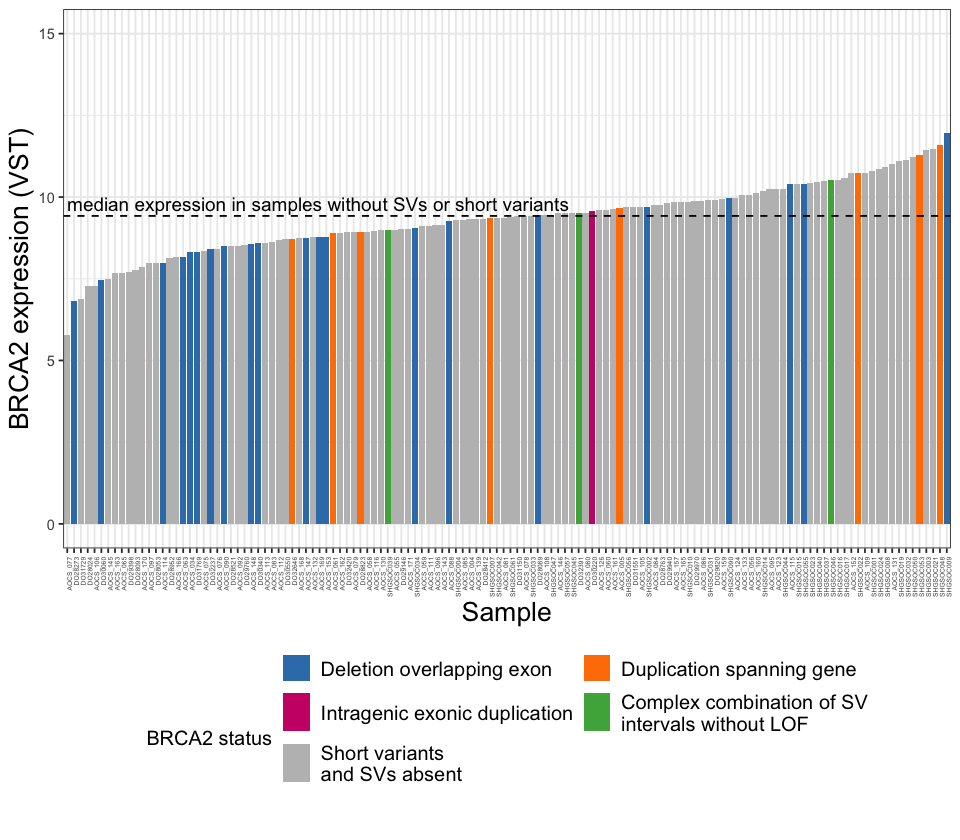

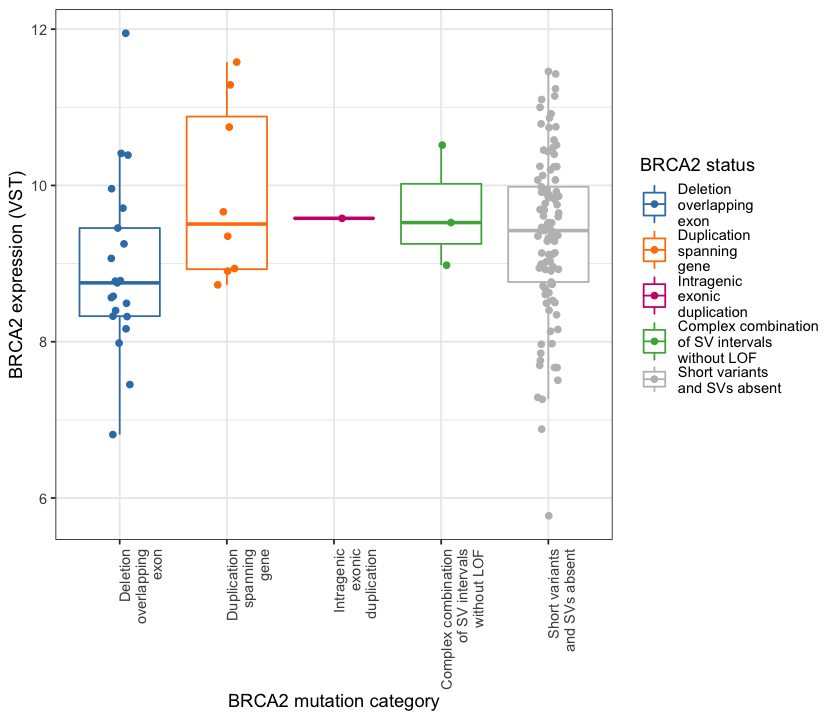

In [52]:
#BRCA2 plots

#sample<-read.table("/Volumes/igmm/HGS-OvarianCancerA-SGP-WGS/BRCA1_BRCA2_SVs_paper/Tables/SampleInformation.txt",sep="\t",header=T,stringsAsFactors=F)
sample<-read.table("~/Desktop/BRCA1_BRCA2_SVs_paper/Tables/SampleInformation.txt",sep="\t",header=T,stringsAsFactors=F)


sample_expr<-sample[,c("Sample","BRCA1status_SV","BRCA2status_SV","BRCA1_pro_meth","BRCA2status","BRCA2_VST")]

coldata<-merge(rna,sample_expr,by="Sample",all.x=T)
rownames(coldata)<-as.character(coldata$RNA_sample)
coldata$Cohort<-substr(as.character(coldata$Sample),1,2)

#Exclude missing
coldata[is.na(coldata$BRCA1status_SV),"BRCA1status_SV"]<-"Excluded"
coldata[is.na(coldata$BRCA2status_SV),"BRCA2status_SV"]<-"Excluded"


#Exclude SNVs from SV absent category
coldata[coldata$BRCA2status=="Germline SNV" & coldata$BRCA2status_SV=="SV absent","BRCA2status_SV"]<-"Excluded"
coldata[coldata$BRCA2status=="Somatic SNV" & coldata$BRCA2status_SV=="SV absent","BRCA2status_SV"]<-"Excluded"

#Exclude methyl from SV absent
coldata[coldata$BRCA1_pro_meth==1,"BRCA1status_SV"]<-"Excluded"
coldata[coldata$BRCA1_pro_meth==1,"BRCA2status_SV"]<-"Excluded"
coldata<-coldata[as.character(rna$RNA_sample),]

coldata$condition<-factor(coldata$BRCA2status_SV)

rownames(coldata)<-c(1:150)

coldata<-coldata[coldata$BRCA2status_SV != "Excluded" & coldata$BRCA2status_SV != "Only methyl",]



coldata$BRCA2status_SV<-factor(coldata$BRCA2status_SV,levels=levels(factor(coldata$BRCA2status_SV))[c(2,3,4,1,5)])
coldata<-coldata[order(coldata$BRCA2_VST),]
coldata<-coldata[is.na(coldata$BRCA2_VST)==FALSE,]
coldata$Sample<-factor(coldata$Sample,levels=as.character(coldata$Sample))


cats<-c("Deletion overlapping exon","Duplication spanning gene","Intragenic exonic duplication",
                      "Complex combination of SV\nintervals without LOF","Short variants\nand SVs absent")

myColors <- c(brewer.pal(9,"Set1")[c(2,5)],"deeppink3",brewer.pal(9,"Set1")[3],"grey")
names(myColors) <- levels(as.factor(coldata$BRCA2status_SV))

fillScale <- scale_fill_manual(name = "BRCA2 status",values = myColors,labels=cats)


#png("~/Desktop/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_figures/Figure4_Expression_barplot_brca2.png",width=8,height=7,res=300,unit="in")
options(repr.plot.width=8,repr.plot.height=7)
ggplot(coldata,aes(x=Sample,y=BRCA2_VST,fill=as.factor(BRCA2status_SV)))+geom_bar(stat="identity")+theme_bw()+
theme(axis.text.x = element_text(angle = 90, hjust = 1,size=4),axis.title=element_text(size=16),
      legend.position="bottom",legend.text = element_text(size=12),legend.title = element_text(size=12))+
guides(fill=guide_legend(nrow=4,byrow=TRUE))+

ylab("BRCA2 expression (VST)")+xlab("Sample")+fillScale+
geom_hline(yintercept=median(coldata[coldata$BRCA2status_SV=="SV absent","BRCA2_VST"]),linetype="dashed")+
annotate("text", x=1, y=9.8, adj=0,label= "median expression in samples without SVs or short variants",size=4)+ylim(c(0,15))
#dev.off()

cats_short<-c("Deletion\noverlapping\nexon","Duplication\nspanning\ngene","Intragenic\nexonic\nduplication",
                      "Complex combination\nof SV intervals\nwithout LOF","Short variants\nand SVs absent")

colScale <- scale_colour_manual(name = "BRCA2 status",values = myColors,labels=cats_short)
options(repr.plot.width=7,repr.plot.height=6)

#png("~/Desktop/BRCA1_BRCA2_SVs_paper/Manuscript/Intermediate_figures/Figure4_Expression_boxplot_brca2.png",width=6,height=5,res=300,unit="in")
ggplot(coldata,aes(x=as.factor(BRCA2status_SV),y=BRCA2_VST,colour=as.factor(BRCA2status_SV)))+geom_boxplot(outlier.shape=NA)+
geom_jitter(width=0.1)+theme_bw()+theme(axis.text.x = element_text(angle = 90, hjust = 1))+
ylab("BRCA2 expression (VST)")+xlab("BRCA2 mutation category")+colScale+scale_x_discrete(labels=cats_short)
#dev.off()